In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from hw2_lasso.code.setup_problem import *

In [4]:
lasso_data_fname = "/home/kwantics/python3-tasks/selfStudy/bloomsBerg/lecture2/hw2_lasso/code/lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = load_problem(lasso_data_fname)

## Featurize

In [5]:
def generateStepFunc(stepLoc=0):
    def f(x):
        ret = np.zeros(len(x))
        ret[x>=stepLoc] = 1
        return ret
    return f

Text(0.5, 0.98, 'Feature Function plot')

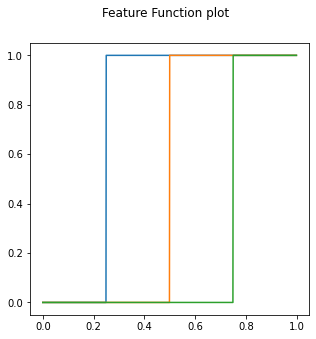

In [10]:
phi1 = generateStepFunc(0.25)
phi2 = generateStepFunc(0.5)
phi3 = generateStepFunc(0.75)

x    = np.arange(0.0, 1.0, 0.001)
fig  = plt.figure(figsize=(5,5))


axes = fig.add_subplot(111)


axes.plot(x,phi1(x),label="First Feature Function")
axes.plot(x,phi2(x),label="Second Feature Function")
axes.plot(x,phi3(x),label="Third Feature Function")

fig.suptitle("Feature Function plot")

In [14]:
designMatrix      = np.zeros((x_train.shape[0],3))
designMatrix[:,0] = phi1(x_train)
designMatrix[:,1] = phi2(x_train)
designMatrix[:,2] = phi3(x_train)

### Visualizations Features

Text(0.5, 0.98, 'Feature distribution/Orignal Feature-Label Covariance')

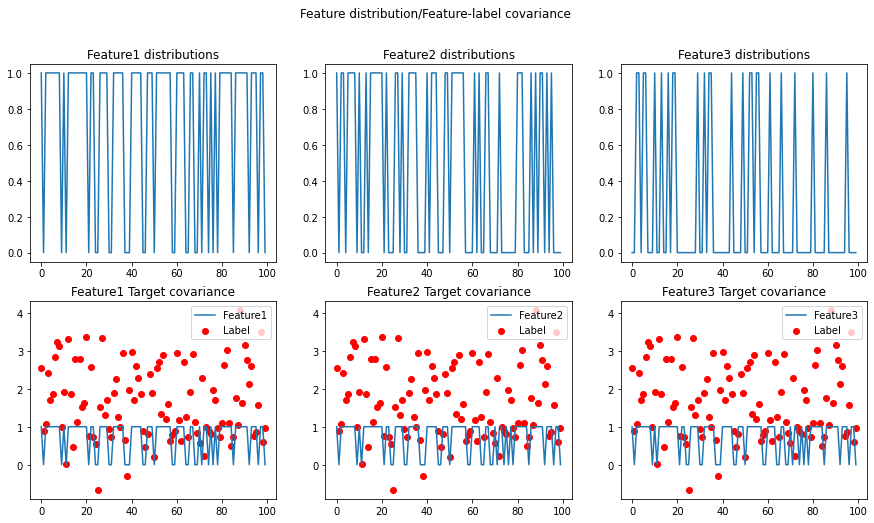

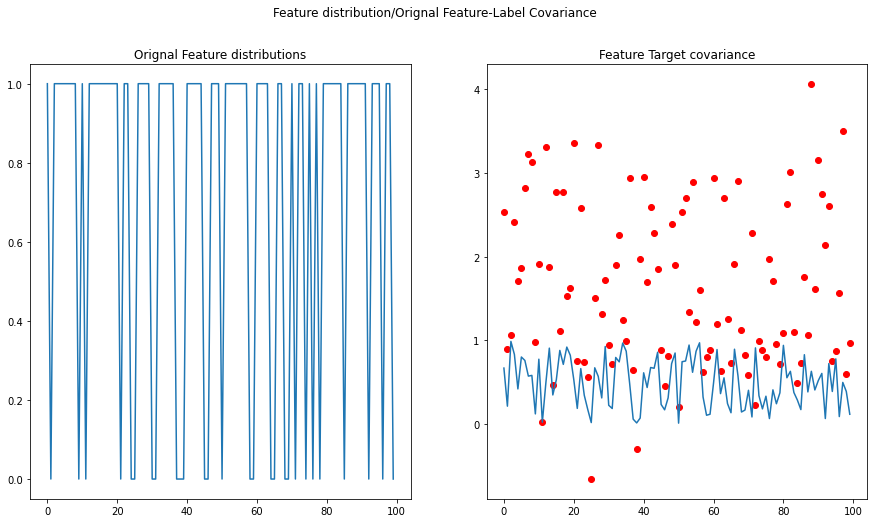

In [36]:
fig = plt.figure(figsize=(15,8))

axesFeat1 = fig.add_subplot(231)
axesFeat2 = fig.add_subplot(232)
axesFeat3 = fig.add_subplot(233)

axesFeatTarget1 = fig.add_subplot(234)
axesFeatTarget2 = fig.add_subplot(235)
axesFeatTarget3 = fig.add_subplot(236)


axesFeat1.plot(range(designMatrix[:,0].shape[0]),designMatrix[:,0])
axesFeat2.plot(range(designMatrix[:,1].shape[0]),designMatrix[:,1])
axesFeat3.plot(range(designMatrix[:,2].shape[0]),designMatrix[:,2])

axesFeat1.set_title("Feature1 distributions")
axesFeat2.set_title("Feature2 distributions")
axesFeat3.set_title("Feature3 distributions")

axesFeatTarget1.plot(range(designMatrix[:,0].shape[0]),designMatrix[:,0],label="Feature1")
axesFeatTarget2.plot(range(designMatrix[:,0].shape[0]),designMatrix[:,0],label="Feature2")
axesFeatTarget3.plot(range(designMatrix[:,0].shape[0]),designMatrix[:,0],label="Feature3")

axesFeatTarget1.scatter(range(len(y_train)),y_train,color="r",label="Label")
axesFeatTarget2.scatter(range(len(y_train)),y_train,color="r",label="Label")
axesFeatTarget3.scatter(range(len(y_train)),y_train,color="r",label="Label")

axesFeatTarget1.set_title("Feature1 Target covariance")
axesFeatTarget2.set_title("Feature2 Target covariance")
axesFeatTarget3.set_title("Feature3 Target covariance")

axesFeatTarget1.legend(loc="upper right")
axesFeatTarget2.legend(loc="upper right")
axesFeatTarget3.legend(loc="upper right")

fig.suptitle("Feature distribution/Feature-label covariance")

fig2 = plt.figure(figsize=(15,8))

axesFeats = fig2.add_subplot(121)
axesFeatsTarget = fig2.add_subplot(122)

axesFeats.plot(range(designMatrix[:,0].shape[0]),designMatrix[:,0])
axesFeats.set_title("Orignal Feature distributions")

axesFeatsTarget.plot(range(x_train.shape[0]),x_train,label="Feature")
axesFeatsTarget.scatter(range(len(y_train)),y_train,color="red",label="Label")
axesFeatsTarget.set_title("Feature Target covariance")

fig2.suptitle("Feature distribution/Orignal Feature-Label Covariance")

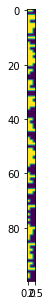

In [38]:
fig = plt.figure(figsize=(5,5))

axes = fig.add_subplot(111)
axes.imshow(designMatrix)